In [ ]:
%matplotlib inline

# Code to calculate absorption coefficient and reflection values for polymer films as measured on bare mirror

#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Define custom functions to calculate c and alpha via T = c + exp(-alpha*t) where T is transmission, c is reflection,
# alpha is extinciton coefficient, and t is thickness
def getC(transmission, alpha, thickness):
    return(transmission-np.exp(-alpha*thickness))
def getAlpha(transmission, c, thickness):
    return(-np.log(transmission-c)/thickness)

path = 'C:\\Users\\acarr.BNL\\Documents\\Data\\Optical Transmission\\'

cEVAtrichloro=[]; alphaEVAtrichloro=[]; transmissionEVAtrichloro=[];
cEVAtoluene=[]; alphaEVAtoluene=[]; transmissionEVAtoluene=[];
cEVAacetone=[]; alphaEVAacetone=[]; transmissionEVAacetone=[];

# load transmission data into lists, convert to arrays
for n in range(1,7):
    samp='p_EVA_trichlorobenzene_'+str(n)+'_fixed.csv';
    A=pd.read_csv(path+'Polymer_Backgrounds\\'+samp);
    transmissionEVAtrichloro.append(A.mean().mean())
    if n==6:
        transmissionEVAtrichloro=np.asarray(transmissionEVAtrichloro)
for n in range(1,7):
    samp='p_EVA_toluene_'+str(n)+'_fixed.csv';
    A=pd.read_csv(path+'Polymer_Backgrounds\\'+samp);
    transmissionEVAtoluene.append(A.mean().mean())
    if n==6:
        transmissionEVAtoluene=np.asarray(transmissionEVAtoluene)
for n in range(1,7):
    samp='p_EVA_acetone_'+str(n)+'_fixed.csv';
    A=pd.read_csv(path+'Polymer_Backgrounds\\'+samp);
    transmissionEVAacetone.append(A.mean().mean())
    if n==6:
        transmissionEVAacetone=np.asarray(transmissionEVAacetone)

thicknessEVAtrichloro=np.asarray([0.172,0.090,0.097,0.090,0.102,0.126])/10; 
thicknessEVAtoluene=np.asarray([0.165,0.207,0.195,0.189,0.160,0.208])/10;
thicknessEVAacetone=np.asarray([0.184,0.219,0.250,0.181,0.215,0.245])/10;

# Calculate constant c using lit alpha of ~ 90. Then calculate actual alpha using average c
for n in range(0,6):
    cEVAtrichloro.append(getC(transmissionEVAtrichloro[n], 90, thicknessEVAtrichloro[n]))
    cEVAtoluene.append(getC(transmissionEVAtoluene[n], 90, thicknessEVAtoluene[n]))
    cEVAacetone.append(getC(transmissionEVAacetone[n], 90, thicknessEVAacetone[n]))
    if n==5:
        cEVAtrichloro=np.asarray(cEVAtrichloro);cEVAtoluene=np.asarray(cEVAtoluene);cEVAacetone=np.asarray(cEVAacetone);
for n in range(0,6):
    alphaEVAtrichloro.append(getAlpha(transmissionEVAtrichloro[n], cEVAtrichloro.mean(), thicknessEVAtrichloro[n]))
    alphaEVAtoluene.append(getAlpha(transmissionEVAtoluene[n], cEVAtoluene.mean(), thicknessEVAtoluene[n]))
    alphaEVAacetone.append(getAlpha(transmissionEVAacetone[n], cEVAacetone.mean(), thicknessEVAacetone[n]))
    if n==5:
        alphaEVAtrichloro=np.asarray(alphaEVAtrichloro);
        alphaEVAtoluene=np.asarray(alphaEVAtoluene); 
        alphaEVAacetone=np.asarray(alphaEVAacetone);
        
# Print all results for averages and std
print('EVA/acetone avg transmission = '+str(transmissionEVAacetone[~np.isnan(transmissionEVAacetone)].mean())...
      +' +/- '+str(transmissionEVAacetone[~np.isnan(transmissionEVAacetone)].std()))
print('EVA/acetone avg alpha = '+str(alphaEVAacetone[~np.isnan(alphaEVAacetone)].mean())+...
      ' +/- '+str(alphaEVAacetone[~np.isnan(alphaEVAacetone)].std()))
print('EVA/acetone avg c = '+str(cEVAacetone[~np.isnan(cEVAacetone)].mean())+...
      ' +/- '+str(cEVAacetone[~np.isnan(cEVAacetone)].std())+'\n')

print('EVA/toluene avg transmission = '+str(transmissionEVAtoluene[~np.isnan(transmissionEVAtoluene)].mean())+...
      ' +/- '+str(transmissionEVAtoluene[~np.isnan(transmissionEVAtoluene)].std()))
print('EVA/toluene avg alpha = '+str(alphaEVAtoluene[~np.isnan(alphaEVAtoluene)].mean())+...
      ' +/- '+str(alphaEVAtoluene[~np.isnan(alphaEVAtoluene)].std()))
print('EVA/toluene avg c = '+str(cEVAtoluene[~np.isnan(cEVAtoluene)].mean())+...
      ' +/- '+str(cEVAtoluene[~np.isnan(cEVAtoluene)].std())+'\n')

print('EVA/trichloro avg transmission = '+str(transmissionEVAtrichloro[~np.isnan(transmissionEVAtrichloro)].mean())+...
      ' +/- '+str(transmissionEVAtrichloro[~np.isnan(transmissionEVAtrichloro)].std()))
print('EVA/trichloro avg alpha = '+str(alphaEVAtrichloro[~np.isnan(alphaEVAtrichloro)].mean())+...
      ' +/- '+str(alphaEVAtrichloro[~np.isnan(alphaEVAtrichloro)].std()))
print('EVA/trichloro avg c = '+str(cEVAtrichloro[~np.isnan(cEVAtrichloro)].mean())+...
      ' +/- '+str(cEVAtrichloro[~np.isnan(cEVAtrichloro)].std())+'\n')

In [ ]:
%matplotlib inline

# Code to plot heatmaps and kernel density estimation curves for polymer films as measured on the bare mirror and in
# in between 2 quartz slides

#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import seaborn as sb

path ='C:\\Users\\acarr.BNL\\Documents\\Data\\Optical Transmission\\';

# Load data
samp='p_EVA_acetone_1_fixed.csv'; polymer1=pd.read_csv(path+'Polymer_Backgrounds\\'+samp);
samp='p_EVA_acetone_2_fixed.csv'; polymer2=pd.read_csv(path+'Polymer_Backgrounds\\'+samp);
samp='p_EVA_acetone_3_fixed.csv'; polymer3=pd.read_csv(path+'Polymer_Backgrounds\\'+samp);
samp='p_EVA_acetone_1_2slides_fixed.csv'; polymer1slides=pd.read_csv(path+samp);
samp='p_EVA_acetone_2_2slides_fixed.csv'; polymer2slides=pd.read_csv(path+samp);
samp='p_EVA_acetone_3_2slides_fixed.csv'; polymer3slides=pd.read_csv(path+samp);

# Make figure with correct subplot axes
fig = plt.figure(figsize = (15,15))
ax1 = plt.subplot2grid((3,3), (0,0)); ax2 = plt.subplot2grid((3,3), (0,1)); ax3 = plt.subplot2grid((3,3), (0,2));
ax4 = plt.subplot2grid((3,3), (1,0)); ax5 = plt.subplot2grid((3,3), (1,1)); ax6 = plt.subplot2grid((3,3), (1,2));
ax7 = plt.subplot2grid((3,3), (2,0)); ax8 = plt.subplot2grid((3,3), (2,1)); ax9 = plt.subplot2grid((3,3), (2,2));

# Show heatmaps and kernel density estimations on axes
sb.heatmap(polymer1, ax=ax1); sb.heatmap(polymer1slides, ax=ax2);
sb.kdeplot(polymer1.values.flatten(), label='EVA', ax=ax3);
sb.kdeplot(polymer1slides.values.flatten(), label='EVA + slides', ax=ax3);

sb.heatmap(polymer2, ax=ax4); sb.heatmap(polymer2slides, ax=ax5);
sb.kdeplot(polymer2.values.flatten(),label='EVA',ax=ax6);
sb.kdeplot(polymer2slides.values.flatten(),label='EVA + slides',ax=ax6); 

sb.heatmap(polymer3, ax=ax7); sb.heatmap(polymer3slides, ax=ax8);
sb.kdeplot(polymer3.values.flatten(),label='EVA',ax=ax9);
sb.kdeplot(polymer3slides.values.flatten(),label='EVA + slides',ax=ax9);

# Generate axes labels
ax=[ax3,ax6,ax9];
for n in ax:
    n.set_ylabel('Probability Density'); n.set_xlabel('Det/Inc');
plt.tight_layout(); plt.show()

In [ ]:
%matplotlib inline

# Code to calculate absorption coefficient and reflection values for polymer films as measured on bare mirror and in
# between two quartz slides

#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Define custom functions to calculate c and alpha via T = c + exp(-alpha*t) where T is transmission, c is reflection,
# alpha is extinciton coefficient, and t is thickness
def getC(transmission, alpha, thickness):
    return(transmission-np.exp(-alpha*thickness))
def getAlpha(transmission, c, thickness):
    return(-np.log(transmission-c)/thickness)

path = 'C:\\Users\\acarr.BNL\\Documents\\Data\\Optical Transmission\\'
cEVAnoslides=[]; alphaEVAnoslides=[]; transmissionEVAnoslides=[];
cEVAslides=[]; alphaEVAslides=[]; transmissionEVAslides=[];

# load transmission data into lists, convert to arrays
for n in range(1,4):
    samp='p_EVA_acetone_'+str(n)+'_fixed.csv';
    A=pd.read_csv(path+'Polymer_Backgrounds\\'+samp);
    transmissionEVAnoslides.append(A.mean().mean())
    if n==3:
        transmissionEVAnoslides=np.asarray(transmissionEVAnoslides)
for n in range(1,4):
    samp='p_EVA_acetone_'+str(n)+'_2slides_fixed.csv';
    A=pd.read_csv(path+samp);
    transmissionEVAslides.append(A.mean().mean())
    if n==3:
        transmissionEVAslides=np.asarray(transmissionEVAslides)
        
thicknessEVA=np.asarray([0.184,0.219,0.250])/10; 

# Calculate constant c using lit alpha of ~ 90. Then calculate actual alpha using average c
for n in range(0,3):
    cEVAnoslides.append(getC(transmissionEVAnoslides[n], 90, thicknessEVA[n]))
    cEVAslides.append(getC(transmissionEVAslides[n], 90, thicknessEVA[n]))
    if n==2:
        cEVAnoslides=np.asarray(cEVAnoslides);cEVAslides=np.asarray(cEVAslides)
for n in range(0,3):
    alphaEVAnoslides.append(getAlpha(transmissionEVAnoslides[n], cEVAnoslides.mean(), thicknessEVA[n]))
    alphaEVAslides.append(getAlpha(transmissionEVAslides[n], cEVAslides.mean(), thicknessEVA[n]))
    if n==2:
        alphaEVAnoslides=np.asarray(alphaEVAnoslides); alphaEVAslides=np.asarray(alphaEVAslides);     

# Print results
print('EVA/noslides avg transmission = '+str(transmissionEVAnoslides[~np.isnan(transmissionEVAnoslides)].mean())+' +/- '+str(transmissionEVAnoslides[~np.isnan(transmissionEVAnoslides)].std()))
print('EVA/noslides avg alpha = '+str(alphaEVAnoslides[~np.isnan(alphaEVAnoslides)].mean())+' +/- '+str(alphaEVAnoslides[~np.isnan(alphaEVAnoslides)].std()))
print('EVA/noslides avg c = '+str(cEVAnoslides[~np.isnan(cEVAnoslides)].mean())+' +/- '+str(cEVAnoslides[~np.isnan(cEVAnoslides)].std())+'\n')

print('EVA/slides avg transmission = '+str(transmissionEVAslides[~np.isnan(transmissionEVAslides)].mean())+' +/- '+str(transmissionEVAslides[~np.isnan(transmissionEVAslides)].std()))
print('EVA/slides avg alpha = '+str(alphaEVAslides[~np.isnan(alphaEVAslides)].mean())+' +/- '+str(alphaEVAslides[~np.isnan(alphaEVAslides)].std()))
print('EVA/slides avg c = '+str(cEVAslides[~np.isnan(cEVAslides)].mean())+' +/- '+str(cEVAslides[~np.isnan(cEVAslides)].std())+'\n')

In [3]:
%matplotlib inline

# Code to calculate absorption coefficient and reflection values for polymer films with and without graphene as measured
# between two quartz slides

#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Define custom functions to calculate c and alpha via T = c + exp(-alpha*t) where T is transmission, c is reflection,
# alpha is extinciton coefficient, and t is thickness
def getC(transmission, alpha, thickness):
    return(transmission-np.exp(-alpha*thickness))
def getAlpha(transmission, c, thickness):
    return(-np.log(transmission-c)/thickness)

path = 'C:\\Users\\acarr.BNL\\Documents\\Data\\Optical Transmission\\'

cEVAGrnoslides=[]; alphaEVAGrnoslides=[]; transmissionEVAGrnoslides=[];
cEVAGrslides=[]; alphaEVAGrslides=[]; transmissionEVAGrslides=[];
thicknessEVA=np.asarray([0.265,0.178,0.234])/10;

# load transmission data into lists, convert to arrays
letters = ['CK','CJ','CL']
for n, lett in enumerate(letters):
    samp='Gr_p_EVA_acetone_'+lett+'_fixed.csv';
    A=pd.read_csv(path+'2019_03_13\\'+samp); transmissionEVAGrnoslides.append(A.mean().mean())
    samp='Gr_p_EVA_acetone_'+lett+'_2slides_fixed.csv';
    A=pd.read_csv(path+'2019_04_26\\'+samp); transmissionEVAGrslides.append(A.mean().mean())
    if n==2:
        transmissionEVAGrnoslides=np.asarray(transmissionEVAGrnoslides); 
        transmissionEVAGrslides=np.asarray(transmissionEVAGrslides)

# Calculate constant c using lit alpha of ~ 90. Then calculate actual alpha using average c
for n in range(0,3):
    cEVAGrnoslides.append(getC(transmissionEVAGrnoslides[n], 90, thicknessEVA[n]))
    cEVAGrslides.append(getC(transmissionEVAGrslides[n], 90, thicknessEVA[n]))
    if n==2:
        cEVAGrnoslides=np.asarray(cEVAGrnoslides);cEVAGrslides=np.asarray(cEVAGrslides)
for n in range(0,3):
    alphaEVAGrnoslides.append(getAlpha(transmissionEVAGrnoslides[n], cEVAGrnoslides.mean(), thicknessEVA[n]))
    alphaEVAGrslides.append(getAlpha(transmissionEVAGrslides[n], cEVAGrslides.mean(), thicknessEVA[n]))
    if n==2:
        alphaEVAGrnoslides=np.asarray(alphaEVAGrnoslides); alphaEVAGrslides=np.asarray(alphaEVAGrslides);     

# Print results
print('Gr/EVA/noslides avg transmission = '+str(transmissionEVAGrnoslides[~np.isnan(transmissionEVAGrnoslides)].mean())+' +/- '+str(transmissionEVAGrnoslides[~np.isnan(transmissionEVAGrnoslides)].std()))
print('Gr/EVA/noslides avg alpha = '+str(alphaEVAGrnoslides[~np.isnan(alphaEVAGrnoslides)].mean())+' +/- '+str(alphaEVAGrnoslides[~np.isnan(alphaEVAGrnoslides)].std()))
print('Gr/EVA/noslides avg c = '+str(cEVAGrnoslides[~np.isnan(cEVAGrnoslides)].mean())+' +/- '+str(cEVAGrnoslides[~np.isnan(cEVAGrnoslides)].std())+'\n')

print('Gr/EVA/slides avg transmission = '+str(transmissionEVAGrslides[~np.isnan(transmissionEVAGrslides)].mean())+' +/- '+str(transmissionEVAGrslides[~np.isnan(transmissionEVAGrslides)].std()))
print('Gr/EVA/slides avg alpha = '+str(alphaEVAGrslides[~np.isnan(alphaEVAGrslides)].mean())+' +/- '+str(alphaEVAGrslides[~np.isnan(alphaEVAGrslides)].std()))
print('Gr/EVA/slides avg c = '+str(cEVAGrslides[~np.isnan(cEVAGrslides)].mean())+' +/- '+str(cEVAGrslides[~np.isnan(cEVAGrslides)].std())+'\n')



Gr/EVA/noslides avg transmission = 0.2807375487880592 +/- 0.045337357990907205
Gr/EVA/noslides avg alpha = 89.985126525846 +/- 0.864266010941332
Gr/EVA/noslides avg c = 0.14230221626830306 +/- 0.0025444788239123136

Gr/EVA/slides avg transmission = 0.3060682017529321 +/- 0.017159675761299613
Gr/EVA/slides avg alpha = 89.60137101485104 +/- 10.741923521023212
Gr/EVA/slides avg c = 0.16763286923317597 +/- 0.032979123942608546



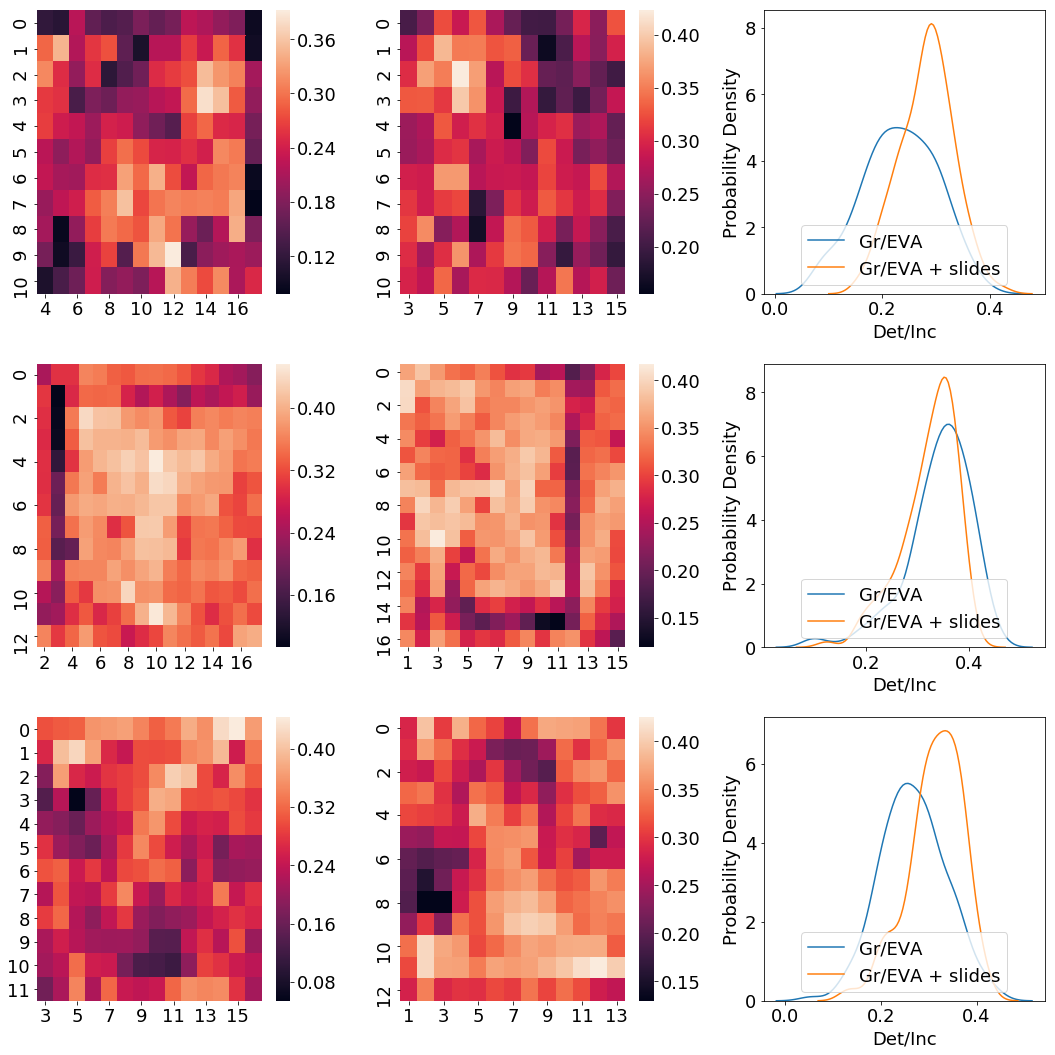

In [5]:
%matplotlib inline

# Code to plot heatmaps and kernel density estimation curves for polymer films with and without graphene as measured
# in between 2 quartz slides

#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import seaborn as sb

# Load heatmap data
path ='C:\\Users\\acarr.BNL\\Documents\\Data\\Optical Transmission\\';

samp='Gr_p_EVA_acetone_CK_fixed.csv'; Grpolymer1=pd.read_csv(path+'2019_03_13\\'+samp);
samp='Gr_p_EVA_acetone_CJ_fixed.csv'; Grpolymer2=pd.read_csv(path+'2019_03_13\\'+samp);
samp='Gr_p_EVA_acetone_CL_fixed.csv'; Grpolymer3=pd.read_csv(path+'2019_03_13\\'+samp);
samp='Gr_p_EVA_acetone_CK_2slides_fixed.csv'; Grpolymer1slides=pd.read_csv(path+'2019_04_26\\'+samp);
samp='Gr_p_EVA_acetone_CJ_2slides_fixed.csv'; Grpolymer2slides=pd.read_csv(path+'2019_04_26\\'+samp);
samp='Gr_p_EVA_acetone_CL_2slides_fixed.csv'; Grpolymer3slides=pd.read_csv(path+'2019_04_26\\'+samp);

# Generate figure with correct subplot axes
fig = plt.figure(figsize = (15,15))
ax1 = plt.subplot2grid((3,3), (0,0)); ax2 = plt.subplot2grid((3,3), (0,1)); ax3 = plt.subplot2grid((3,3), (0,2));
ax4 = plt.subplot2grid((3,3), (1,0)); ax5 = plt.subplot2grid((3,3), (1,1)); ax6 = plt.subplot2grid((3,3), (1,2));
ax7 = plt.subplot2grid((3,3), (2,0)); ax8 = plt.subplot2grid((3,3), (2,1)); ax9 = plt.subplot2grid((3,3), (2,2));

# Plot heatmaps and kde on correct axes
sb.heatmap(Grpolymer1, ax=ax1); sb.heatmap(Grpolymer1slides, ax=ax2);
sb.kdeplot(Grpolymer1.values.flatten(), label='Gr/EVA', ax=ax3);
sb.kdeplot(Grpolymer1slides.values.flatten(), label='Gr/EVA + slides', ax=ax3);

sb.heatmap(Grpolymer2, ax=ax4); sb.heatmap(Grpolymer2slides, ax=ax5);
sb.kdeplot(Grpolymer2.values.flatten(),label='Gr/EVA',ax=ax6);
sb.kdeplot(Grpolymer2slides.values.flatten(),label='Gr/EVA + slides',ax=ax6); 

sb.heatmap(Grpolymer3, ax=ax7); sb.heatmap(Grpolymer3slides, ax=ax8);
sb.kdeplot(Grpolymer3.values.flatten(),label='Gr/EVA',ax=ax9);
sb.kdeplot(Grpolymer3slides.values.flatten(),label='Gr/EVA + slides',ax=ax9);

# Add axes labels
ax=[ax3,ax6,ax9];
for n in ax:
    n.set_ylabel('Probability Density'); n.set_xlabel('Det/Inc'); n.legend(loc=8)
plt.tight_layout(); plt.show()

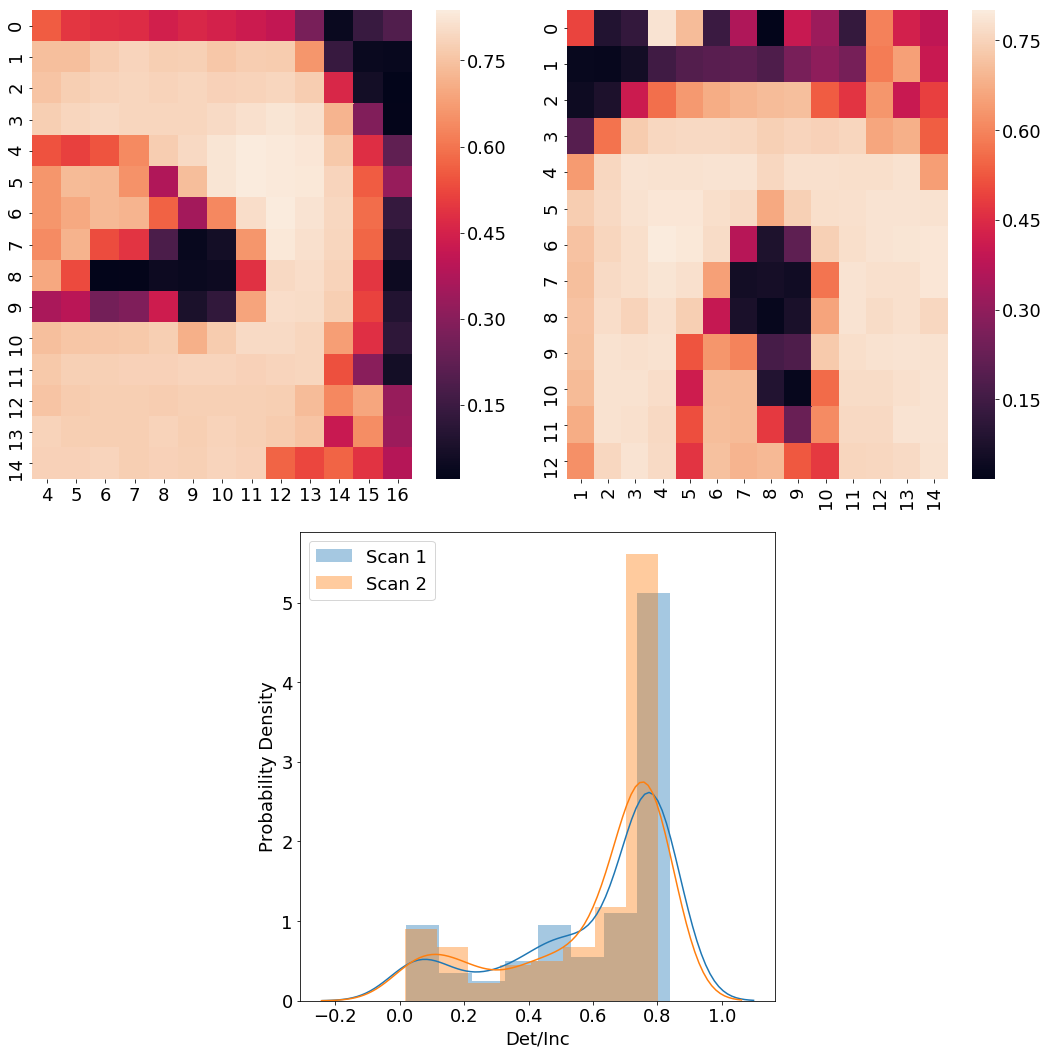

In [12]:
%matplotlib inline

# Code to plot heatmaps and kernel density estimation curves for PMMA samples measured on different/same days

#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import seaborn as sb

# Load heatmap data
path ='C:\\Users\\acarr.BNL\\Documents\\Data\\Optical Transmission\\2019_05_13\\';

samp='PMMA_180_4'; 
Grpolymer1=pd.read_csv(path+samp+'_fixed.csv'); Grpolymer2=pd.read_csv(path+samp+'_check_fixed.csv');

# Generate figure with correct subplot axes
fig = plt.figure(figsize = (15,15))
ax1 = plt.subplot2grid((2,4), (0,0), colspan = 2); ax2 = plt.subplot2grid((2,4), (0,2), colspan = 2); 
ax3 = plt.subplot2grid((2,4), (1,1), colspan = 2); 

# Plot heatmaps and kde on correct axes
sb.heatmap(Grpolymer1, ax=ax1);
sb.distplot(Grpolymer1.values.flatten(), label='Scan 1', ax=ax3);

sb.heatmap(Grpolymer2, ax=ax2);
sb.distplot(Grpolymer2.values.flatten(),label='Scan 2',ax=ax3); 

# Add axes labels
ax3.set_ylabel('Probability Density'); ax3.set_xlabel('Det/Inc'); #n.legend(loc=8)
ax3.legend(); plt.tight_layout(); plt.show()

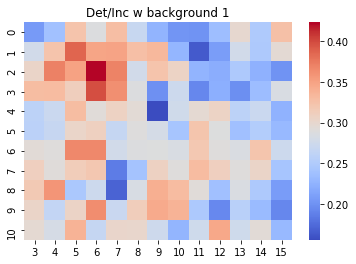

avg Det/Inc = 0.282384700034965
min Det/Inc = 0.155893536
max Det/Inc = 0.423054257


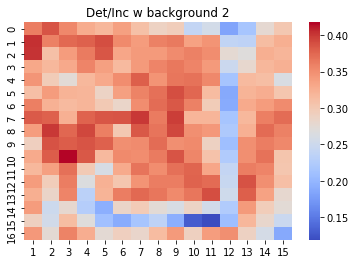

avg Det/Inc = 0.3224925848392157
min Det/Inc = 0.118965803
max Det/Inc = 0.41746816


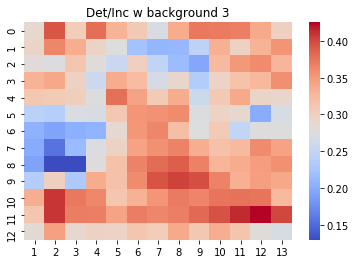

avg Det/Inc = 0.31332732038461536
min Det/Inc = 0.12960924599999998
max Det/Inc = 0.425174094


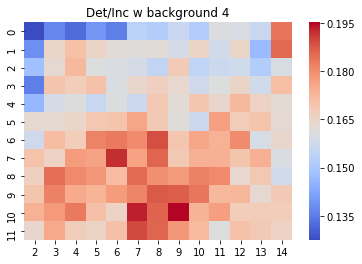

avg Det/Inc = 0.16768854092307692
min Det/Inc = 0.12748178300000002
max Det/Inc = 0.19528887600000006


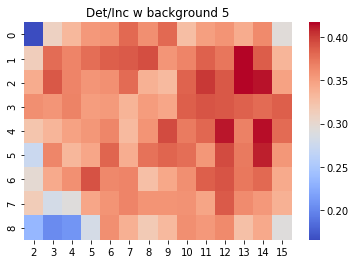

avg Det/Inc = 0.3544511588015872
min Det/Inc = 0.165417594
max Det/Inc = 0.417181381


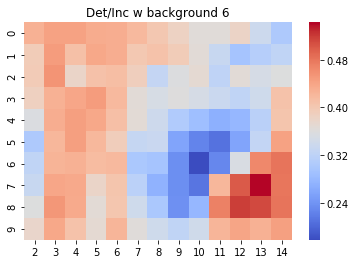

avg Det/Inc = 0.37565063913076924
min Det/Inc = 0.17851302
max Det/Inc = 0.542491011


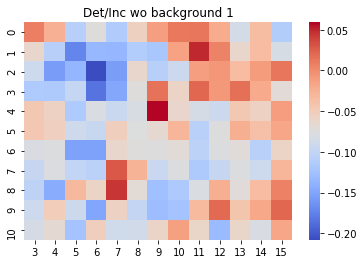

background = 0.21501590111462013


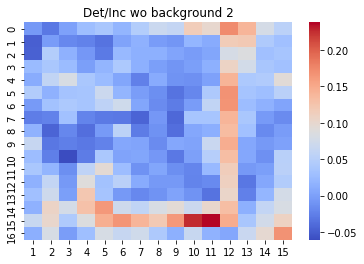

background = 0.3567998272836028


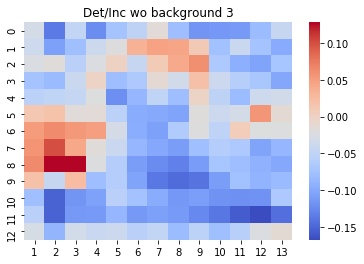

background = 0.25770933233344534


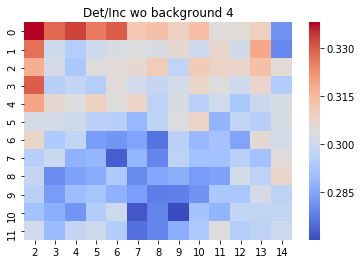

background = 0.4654725976876037


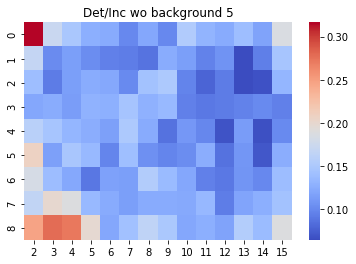

background = 0.4818629860911026


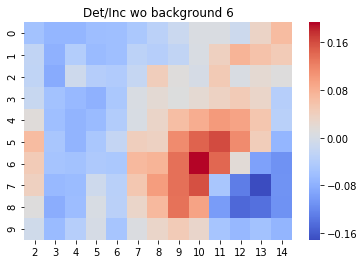

background = 0.3715578423747306


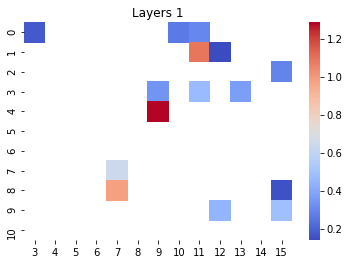

Avg layers = 0.4586543471475391


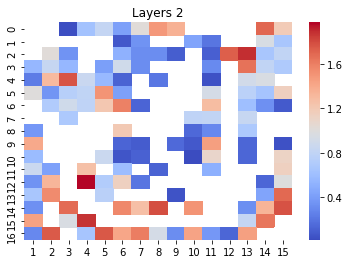

Avg layers = 0.796667669136659


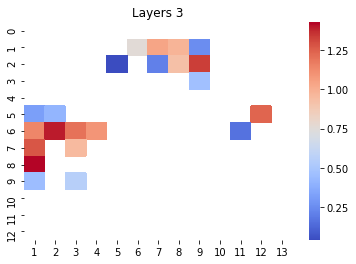

Avg layers = 0.7539012021104718
Avg layers = nan


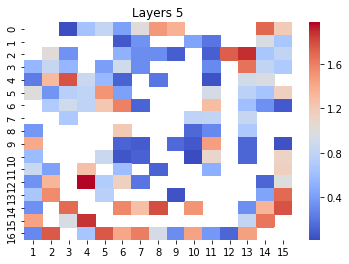

Avg layers = 0.796667669136659


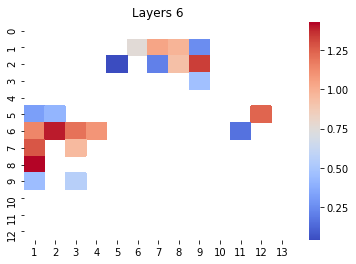

Avg layers = 0.7539012021104718


In [19]:
%matplotlib inline
%run get_heatmap.ipynb

# Code to calculate number of layers of graphene transferred as measured between two quartz slides

#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

def trans_curve(x, alpha, c):
    # where x is film thickness [cm], y is optical transmission, aplha is absorption coefficient [1/cm], and c is both
    # back and front reflection plus other constants
    return(c + np.exp(-alpha*x))
def getC(transmission, alpha, thickness):
    return(transmission-np.exp(-alpha*thickness))
def getAlpha(transmission, c, thickness):
    return(-np.log(transmission-c)/thickness)

# Load heatmap data
path ='C:\\Users\\acarr.BNL\\Documents\\Data\\Optical Transmission\\';

samp='Gr_p_EVA_acetone_CK_2slides_fixed.csv'; stackPower1=pd.read_csv(path+'2019_04_26\\'+samp);
samp='Gr_p_EVA_acetone_CJ_2slides_fixed.csv'; stackPower2=pd.read_csv(path+'2019_04_26\\'+samp);
samp='Gr_p_EVA_acetone_CL_2slides_fixed.csv'; stackPower3=pd.read_csv(path+'2019_04_26\\'+samp);
samp='Gr_p_EVA_acetone_BH_2slides_fixed.csv'; stackPower4=pd.read_csv(path+'2019_04_30\\'+samp);
samp='Gr_p_EVA_acetone_BG_2slides_fixed.csv'; stackPower5=pd.read_csv(path+'2019_04_30\\'+samp);
samp='Gr_p_EVA_acetone_BF_2slides_fixed.csv'; stackPower6=pd.read_csv(path+'2019_04_30\\'+samp);

c=-0.006135; alpha=56.94;

bkg1 = trans_curve(0.0265, alpha, c); bkg2 = trans_curve(0.0178, alpha, c); bkg3 = trans_curve(0.0234, alpha, c);
bkg4 = trans_curve(0.0132, alpha, c); bkg5 = trans_curve(0.0126, alpha, c); bkg6 = trans_curve(0.0171, alpha, c);

# Calculate number of layers of graphene assuming each layer of  graphene absorbs 4.6% of HeNe laser roundtrip, i.e. 
# light passes through each layer twice, for the Gr/polymer stack
stackLayers1=(bkg1 - stackPower1)/0.046; 
stackLayers1=stackLayers1[stackLayers1>0]; stackLayers1=stackLayers1[stackLayers1<2]
stackLayers2=(bkg2 - stackPower2)/0.046
stackLayers2=stackLayers2[stackLayers2>0]; stackLayers2=stackLayers2[stackLayers2<2]
stackLayers3=(bkg3 - stackPower3)/0.046
stackLayers3=stackLayers3[stackLayers3>0]; stackLayers3=stackLayers3[stackLayers3<2]
stackLayers4=(bkg4 - stackPower4)/0.046; 
stackLayers4=stackLayers4[stackLayers4>0]; stackLayers4=stackLayers4[stackLayers4<2]
stackLayers5=(bkg5 - stackPower5)/0.046
stackLayers5=stackLayers5[stackLayers5>0]; stackLayers5=stackLayers2[stackLayers2<2]
stackLayers6=(bkg6 - stackPower6)/0.046
stackLayers6=stackLayers6[stackLayers6>0]; stackLayers6=stackLayers3[stackLayers3<2]

idx1 = 0; idx2 = 25; idx3 = 0; idx4 = 25;
#idx1 = 2; idx2 = 10; idx3 = 2; idx4 = 12;

plt.title('Det/Inc w background 1')
plt.show(sb.heatmap(stackPower1, annot = False, cmap = 'coolwarm'))
print('avg Det/Inc = ' + str(stackPower1.mean().mean()))
print('min Det/Inc = ' +str(stackPower1.min().min())); print('max Det/Inc = ' +str(stackPower1.max().max()))
plt.title('Det/Inc w background 2')
plt.show(sb.heatmap(stackPower2, annot = False, cmap = 'coolwarm'))
print('avg Det/Inc = ' + str(stackPower2.mean().mean()))
print('min Det/Inc = ' +str(stackPower2.min().min())); print('max Det/Inc = ' +str(stackPower2.max().max()))
plt.title('Det/Inc w background 3')
plt.show(sb.heatmap(stackPower3, annot = False, cmap = 'coolwarm'))
print('avg Det/Inc = ' + str(stackPower3.mean().mean()))
print('min Det/Inc = ' +str(stackPower3.min().min())); print('max Det/Inc = ' +str(stackPower3.max().max()))
plt.title('Det/Inc w background 4')
plt.show(sb.heatmap(stackPower4, annot = False, cmap = 'coolwarm'))
print('avg Det/Inc = ' + str(stackPower4.mean().mean()))
print('min Det/Inc = ' +str(stackPower4.min().min())); print('max Det/Inc = ' +str(stackPower4.max().max()))
plt.title('Det/Inc w background 5')
plt.show(sb.heatmap(stackPower5, annot = False, cmap = 'coolwarm'))
print('avg Det/Inc = ' + str(stackPower5.mean().mean()))
print('min Det/Inc = ' +str(stackPower5.min().min())); print('max Det/Inc = ' +str(stackPower5.max().max()))
plt.title('Det/Inc w background 6')
plt.show(sb.heatmap(stackPower6, annot = False, cmap = 'coolwarm'))
print('avg Det/Inc = ' + str(stackPower6.mean().mean()))
print('min Det/Inc = ' +str(stackPower6.min().min())); print('max Det/Inc = ' +str(stackPower6.max().max()))

background = np.zeros_like(stackPower1) + bkg1; stackPower1_nobkg = background - stackPower1
background = np.zeros_like(stackPower2) + bkg2; stackPower2_nobkg = background - stackPower2
background = np.zeros_like(stackPower3) + bkg3; stackPower3_nobkg = background - stackPower3
background = np.zeros_like(stackPower4) + bkg4; stackPower4_nobkg = background - stackPower4
background = np.zeros_like(stackPower5) + bkg5; stackPower5_nobkg = background - stackPower5
background = np.zeros_like(stackPower6) + bkg6; stackPower6_nobkg = background - stackPower6

plt.title('Det/Inc wo background 1')
plt.show(sb.heatmap(stackPower1_nobkg, annot = False, cmap = 'coolwarm'))
print('background = ' + str(bkg1))
plt.title('Det/Inc wo background 2')
plt.show(sb.heatmap(stackPower2_nobkg, annot = False, cmap = 'coolwarm'))
print('background = ' + str(bkg2))
plt.title('Det/Inc wo background 3')
plt.show(sb.heatmap(stackPower3_nobkg, annot = False, cmap = 'coolwarm'))
print('background = ' + str(bkg3))
plt.title('Det/Inc wo background 4')
plt.show(sb.heatmap(stackPower4_nobkg, annot = False, cmap = 'coolwarm'))
print('background = ' + str(bkg4))
plt.title('Det/Inc wo background 5')
plt.show(sb.heatmap(stackPower5_nobkg, annot = False, cmap = 'coolwarm'))
print('background = ' + str(bkg5))
plt.title('Det/Inc wo background 6')
plt.show(sb.heatmap(stackPower6_nobkg, annot = False, cmap = 'coolwarm'))
print('background = ' + str(bkg6))

plt.title('Layers 1')
plt.show(sb.heatmap(stackLayers1, annot = False, cmap='coolwarm'))
print('Avg layers = ' + str(stackLayers1.mean().mean()))
plt.title('Layers 2')
plt.show(sb.heatmap(stackLayers2, annot = False, cmap='coolwarm'))
print('Avg layers = ' + str(stackLayers2.mean().mean()))
plt.title('Layers 3')
plt.show(sb.heatmap(stackLayers3, annot = False, cmap='coolwarm'))
print('Avg layers = ' + str(stackLayers3.mean().mean()))
plt.title('Layers 4')
#plt.show(sb.heatmap(stackLayers4, annot = False, cmap='coolwarm'))
print('Avg layers = ' + str(stackLayers4.mean().mean()))
plt.title('Layers 5')
plt.show(sb.heatmap(stackLayers5, annot = False, cmap='coolwarm'))
print('Avg layers = ' + str(stackLayers5.mean().mean()))
plt.title('Layers 6')
plt.show(sb.heatmap(stackLayers6, annot = False, cmap='coolwarm'))
print('Avg layers = ' + str(stackLayers6.mean().mean()))


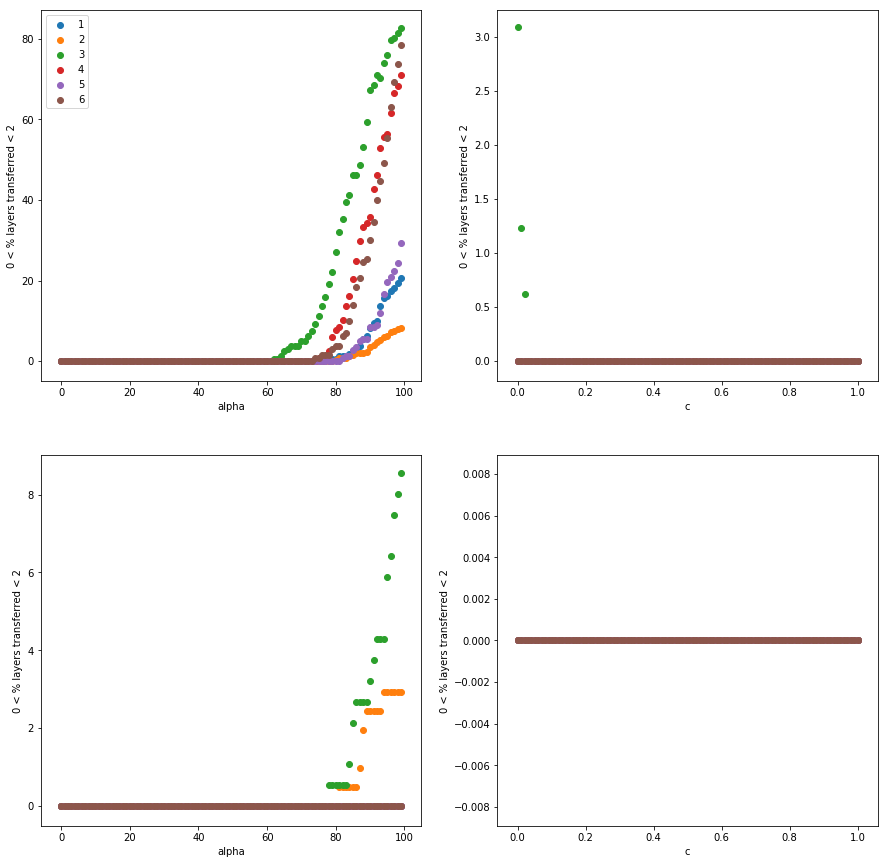

avg alpha no slides = 99.0 +/- 0.0
avg alpha slides = 50.31449631449632 +/- 29.27257920052432
avg c no slides = 0.499001996007984 +/- 0.2921389168176746
avg c slides = 0.5 +/- 0.29157646512850627


In [8]:
%matplotlib inline
%run get_heatmap.ipynb

# Code to calculate number of layers of graphene transferred as measured between two quartz slides as a funciton of alpha 
# and c

#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

def trans_curve(x, alpha, c):
    # where x is film thickness [cm], y is optical transmission, aplha is absorption coefficient [1/cm], and c is both
    # back and front reflection plus other constants
    return(c + np.exp(-alpha*x))
def getC(transmission, alpha, thickness):
    return(transmission-np.exp(-alpha*thickness))
def getAlpha(transmission, c, thickness):
    return(-np.log(transmission-c)/thickness)

# Load heatmap data
path ='C:\\Users\\acarr.BNL\\Documents\\Data\\Optical Transmission\\';

samp='Gr_p_PE_hexane_O_2slides_fixed.csv'; stackPower1slides=pd.read_csv(path+'2019_05_08\\'+samp);
samp='Gr_p_PE_hexane_M_2slides_fixed.csv'; stackPower2slides=pd.read_csv(path+'2019_05_08\\'+samp);
samp='Gr_p_PE_hexane_N_2slides_fixed.csv'; stackPower3slides=pd.read_csv(path+'2019_05_08\\'+samp);
samp='Gr_p_PE_hexane_CP_2slides_fixed.csv'; stackPower4slides=pd.read_csv(path+'2019_05_08\\'+samp);
samp='Gr_p_PE_hexane_CQ_2slides_fixed.csv'; stackPower5slides=pd.read_csv(path+'2019_05_08\\'+samp);
samp='Gr_p_PE_hexane_CR_2slides_fixed.csv'; stackPower6slides=pd.read_csv(path+'2019_05_08\\'+samp);

samp='Gr_p_PE_hexane_O_fixed.csv'; stackPower1noslides=pd.read_csv(path+'2019_03_11\\'+samp);
samp='Gr_p_PE_hexane_M_fixed.csv'; stackPower2noslides=pd.read_csv(path+'2019_03_11\\'+samp);
samp='Gr_p_PE_hexane_N_fixed.csv'; stackPower3noslides=pd.read_csv(path+'2019_03_11\\'+samp);
samp='Gr_p_PE_hexane_CP_fixed.csv'; stackPower4noslides=pd.read_csv(path+'2019_03_18\\'+samp);
samp='Gr_p_PE_hexane_CQ_fixed.csv'; stackPower5noslides=pd.read_csv(path+'2019_03_18\\'+samp);
samp='Gr_p_PE_hexane_CR_fixed.csv'; stackPower6noslides=pd.read_csv(path+'2019_03_18\\'+samp);

percentSlidesC1=[];percentSlidesC2=[];percentSlidesC3=[];percentSlidesC4=[];percentSlidesC5=[];percentSlidesC6=[];
percentSlidesAlpha1=[];percentSlidesAlpha2=[];percentSlidesAlpha3=[];
percentSlidesAlpha4=[];percentSlidesAlpha5=[];percentSlidesAlpha6=[];
percentNoSlidesC1=[];percentNoSlidesC2=[];percentNoSlidesC3=[];
percentNoSlidesC4=[];percentNoSlidesC5=[];percentNoSlidesC6=[];
percentNoSlidesAlpha1=[];percentNoSlidesAlpha2=[];percentNoSlidesAlpha3=[];
percentNoSlidesAlpha4=[];percentNoSlidesAlpha5=[];percentNoSlidesAlpha6=[];

avgNoSlidesAlpha=[];avgNoSlidesC=[];avgSlidesAlpha=[];avgSlidesC=[];

c=0.1; alpha=50;

for n in range(0,100,1):
    A=pd.DataFrame();B=A;C=A;D=A;E=A;F=A;
    bkg1=trans_curve(0.0163, n, c);stackLayers1slides=(bkg1-stackPower1slides)/0.046;
    bkg2=trans_curve(0.0132, n, c);stackLayers2slides=(bkg2-stackPower2slides)/0.046;
    bkg3=trans_curve(0.0201, n, c);stackLayers3slides=(bkg3-stackPower3slides)/0.046;
    bkg4=trans_curve(0.0189, n, c);stackLayers4slides=(bkg4-stackPower4slides)/0.046;
    bkg5=trans_curve(0.0151, n, c);stackLayers5slides=(bkg5-stackPower5slides)/0.046;
    bkg6=trans_curve(0.0180, n, c);stackLayers6slides=(bkg6-stackPower6slides)/0.046;
    A=stackLayers1slides[stackLayers1slides>0]; A=A[A<2]; A=A.values.flatten();
    percentSlidesAlpha1.append((len(A[~np.isnan(A)])/len(A)*100));
    B=stackLayers2slides[stackLayers2slides>0]; B=B[B<2]; B=B.values.flatten();
    percentSlidesAlpha2.append((len(B[~np.isnan(B)])/len(B)*100));
    C=stackLayers3slides[stackLayers3slides>0]; C=C[C<2]; C=C.values.flatten();
    percentSlidesAlpha3.append((len(C[~np.isnan(C)])/len(C)*100))
    D=stackLayers4slides[stackLayers4slides>0]; D=D[D<2]; D=D.values.flatten();
    percentSlidesAlpha4.append((len(D[~np.isnan(D)])/len(D)*100));
    E=stackLayers5slides[stackLayers5slides>0]; E=E[E<2]; E=E.values.flatten();
    percentSlidesAlpha5.append((len(E[~np.isnan(E)])/len(E)*100));
    F=stackLayers6slides[stackLayers6slides>0]; F=F[F<2]; F=F.values.flatten();
    percentSlidesAlpha6.append((len(F[~np.isnan(F)])/len(F)*100))
    
    A=pd.DataFrame();B=A;C=A;D=A;E=A;F=A;
    stackLayers1noslides=(bkg1-stackPower1noslides)/0.046;
    stackLayers2noslides=(bkg2-stackPower2noslides)/0.046;
    stackLayers3noslides=(bkg3-stackPower3noslides)/0.046;
    stackLayers4noslides=(bkg4-stackPower4noslides)/0.046;
    stackLayers5noslides=(bkg5-stackPower5noslides)/0.046;
    stackLayers6noslides=(bkg6-stackPower6noslides)/0.046;
    A=stackLayers1noslides[stackLayers1noslides>0]; A=A[A<2]; A=A.values.flatten();
    percentNoSlidesAlpha1.append((len(A[~np.isnan(A)])/len(A)*100));
    B=stackLayers2noslides[stackLayers2noslides>0]; B=B[B<2]; B=B.values.flatten();
    percentNoSlidesAlpha2.append((len(B[~np.isnan(B)])/len(B)*100));
    C=stackLayers3noslides[stackLayers3noslides>0]; C=C[C<2]; C=C.values.flatten();
    percentNoSlidesAlpha3.append((len(C[~np.isnan(C)])/len(C)*100))
    D=stackLayers4noslides[stackLayers4noslides>0]; D=D[D<2]; D=D.values.flatten();
    percentNoSlidesAlpha4.append((len(D[~np.isnan(D)])/len(D)*100));
    E=stackLayers5noslides[stackLayers5noslides>0]; E=E[E<2]; E=E.values.flatten();
    percentNoSlidesAlpha5.append((len(E[~np.isnan(E)])/len(E)*100));
    F=stackLayers6noslides[stackLayers6noslides>0]; F=F[F<2]; F=F.values.flatten();
    percentNoSlidesAlpha6.append((len(F[~np.isnan(F)])/len(F)*100))

for n in np.linspace(0,1,100):
    A=pd.DataFrame();B=A;C=A;D=A;E=A;F=A;
    bkg1=trans_curve(0.0163, alpha, n);stackLayers1slides=(bkg1-stackPower1slides)/0.046;
    bkg2=trans_curve(0.0132, alpha, n);stackLayers2slides=(bkg2-stackPower2slides)/0.046;
    bkg3=trans_curve(0.0201, alpha, n);stackLayers3slides=(bkg3-stackPower3slides)/0.046;
    bkg4=trans_curve(0.0189, alpha, n);stackLayers4slides=(bkg4-stackPower4slides)/0.046;
    bkg5=trans_curve(0.0151, alpha, n);stackLayers5slides=(bkg5-stackPower5slides)/0.046;
    bkg6=trans_curve(0.0180, alpha, n);stackLayers6slides=(bkg6-stackPower6slides)/0.046;
    A=stackLayers1slides[stackLayers1slides>0]; A=A[A<2]; A=A.values.flatten();
    percentSlidesC1.append((len(A[~np.isnan(A)])/len(A)*100));
    B=stackLayers2slides[stackLayers2slides>0]; B=B[B<2]; B=B.values.flatten();
    percentSlidesC2.append((len(B[~np.isnan(B)])/len(B)*100));
    C=stackLayers3slides[stackLayers3slides>0]; C=C[C<2]; C=C.values.flatten();
    percentSlidesC3.append((len(C[~np.isnan(C)])/len(C)*100))
    D=stackLayers4slides[stackLayers4slides>0]; D=D[D<2]; D=D.values.flatten();
    percentSlidesC4.append((len(D[~np.isnan(D)])/len(D)*100));
    E=stackLayers5slides[stackLayers5slides>0]; E=E[E<2]; E=E.values.flatten();
    percentSlidesC5.append((len(E[~np.isnan(E)])/len(E)*100));
    F=stackLayers6slides[stackLayers6slides>0]; F=F[F<2]; F=F.values.flatten();
    percentSlidesC6.append((len(F[~np.isnan(F)])/len(F)*100))
    
    A=pd.DataFrame();B=A;C=A;D=A;E=A;F=A;
    stackLayers1noslides=(bkg1-stackPower1noslides)/0.046;
    stackLayers2noslides=(bkg2-stackPower2noslides)/0.046;
    stackLayers3noslides=(bkg3-stackPower3noslides)/0.046;
    stackLayers4noslides=(bkg4-stackPower4noslides)/0.046;
    stackLayers5noslides=(bkg5-stackPower5noslides)/0.046;
    stackLayers6noslides=(bkg6-stackPower6noslides)/0.046;
    A=stackLayers1noslides[stackLayers1noslides>0]; A=A[A<2]; A=A.values.flatten();
    percentNoSlidesC1.append((len(A[~np.isnan(A)])/len(A)*100));
    B=stackLayers2noslides[stackLayers2noslides>0]; B=B[B<2]; B=B.values.flatten();
    percentNoSlidesC2.append((len(B[~np.isnan(B)])/len(B)*100));
    C=stackLayers3noslides[stackLayers3noslides>0]; C=C[C<2]; C=C.values.flatten();
    percentNoSlidesC3.append((len(C[~np.isnan(C)])/len(C)*100))
    D=stackLayers4noslides[stackLayers4noslides>0]; D=D[D<2]; D=D.values.flatten();
    percentNoSlidesC4.append((len(D[~np.isnan(D)])/len(D)*100));
    E=stackLayers5noslides[stackLayers5noslides>0]; E=E[E<2]; E=E.values.flatten();
    percentNoSlidesC5.append((len(E[~np.isnan(E)])/len(E)*100));
    F=stackLayers6noslides[stackLayers6noslides>0]; F=F[F<2]; F=F.values.flatten();
    percentNoSlidesC6.append((len(F[~np.isnan(F)])/len(F)*100))

percentNoSlidesAlpha1=np.asarray(percentNoSlidesAlpha1); percentNoSlidesC1=np.asarray(percentNoSlidesC1);
percentNoSlidesAlpha2=np.asarray(percentNoSlidesAlpha2); percentNoSlidesC2=np.asarray(percentNoSlidesC2);
percentNoSlidesAlpha3=np.asarray(percentNoSlidesAlpha3); percentNoSlidesC3=np.asarray(percentNoSlidesC3);
percentNoSlidesAlpha4=np.asarray(percentNoSlidesAlpha4); percentNoSlidesC4=np.asarray(percentNoSlidesC4);
percentNoSlidesAlpha5=np.asarray(percentNoSlidesAlpha5); percentNoSlidesC5=np.asarray(percentNoSlidesC5);
percentNoSlidesAlpha6=np.asarray(percentNoSlidesAlpha6); percentNoSlidesC6=np.asarray(percentNoSlidesC6);

percentSlidesAlpha1=np.asarray(percentSlidesAlpha1); percentSlidesC1=np.asarray(percentSlidesC1);
percentSlidesAlpha2=np.asarray(percentSlidesAlpha2); percentSlidesC2=np.asarray(percentSlidesC2);
percentSlidesAlpha3=np.asarray(percentSlidesAlpha3); percentSlidesC3=np.asarray(percentSlidesC3);
percentSlidesAlpha4=np.asarray(percentSlidesAlpha4); percentSlidesC4=np.asarray(percentSlidesC4);
percentSlidesAlpha5=np.asarray(percentSlidesAlpha5); percentSlidesC5=np.asarray(percentSlidesC5);
percentSlidesAlpha6=np.asarray(percentSlidesAlpha6); percentSlidesC6=np.asarray(percentSlidesC6);
    
fig, ax = plt.subplots(2,2, figsize=(15,15));    
ax[0,0].set_xlabel('alpha');ax[1,0].set_xlabel('alpha');ax[0,1].set_xlabel('c');ax[1,1].set_xlabel('c');
ax[0,0].set_ylabel('0 < % layers transferred < 2');ax[0,1].set_ylabel('0 < % layers transferred < 2');
ax[1,0].set_ylabel('0 < % layers transferred < 2');ax[1,1].set_ylabel('0 < % layers transferred < 2');


cX = np.linspace(0,1,100); alphaX = np.arange(0,100,1);

ax[0,0].scatter(alphaX,percentNoSlidesAlpha1,color='C0'); ax[0,1].scatter(cX, percentNoSlidesC1,color='C0');
ax[0,0].scatter(alphaX,percentNoSlidesAlpha2,color='C1'); ax[0,1].scatter(cX, percentNoSlidesC2,color='C1');
ax[0,0].scatter(alphaX,percentNoSlidesAlpha3,color='C2'); ax[0,1].scatter(cX, percentNoSlidesC3,color='C2');
ax[0,0].scatter(alphaX,percentNoSlidesAlpha4,color='C3'); ax[0,1].scatter(cX, percentNoSlidesC4,color='C3');
ax[0,0].scatter(alphaX,percentNoSlidesAlpha5,color='C4'); ax[0,1].scatter(cX, percentNoSlidesC5,color='C4');
ax[0,0].scatter(alphaX,percentNoSlidesAlpha6,color='C5'); ax[0,1].scatter(cX, percentNoSlidesC6,color='C5');

ax[1,0].scatter(alphaX,percentSlidesAlpha1,color='C0'); ax[1,1].scatter(cX, percentSlidesC1,color='C0');
ax[1,0].scatter(alphaX,percentSlidesAlpha2,color='C1'); ax[1,1].scatter(cX, percentSlidesC2,color='C1');
ax[1,0].scatter(alphaX,percentSlidesAlpha3,color='C2'); ax[1,1].scatter(cX, percentSlidesC3,color='C2');
ax[1,0].scatter(alphaX,percentSlidesAlpha4,color='C3'); ax[1,1].scatter(cX, percentSlidesC4,color='C3');
ax[1,0].scatter(alphaX,percentSlidesAlpha5,color='C4'); ax[1,1].scatter(cX, percentSlidesC5,color='C4');
ax[1,0].scatter(alphaX,percentSlidesAlpha6,color='C5'); ax[1,1].scatter(cX, percentSlidesC6,color='C5');

ax[0,0].legend(('1','2','3','4','5','6'))

avgSlidesAlpha.append(alphaX[[i for i, j in enumerate(percentSlidesAlpha1) if j == percentSlidesAlpha1.max()]]);
avgSlidesAlpha.append(alphaX[[i for i, j in enumerate(percentSlidesAlpha2) if j == percentSlidesAlpha2.max()]]);
avgSlidesAlpha.append(alphaX[[i for i, j in enumerate(percentSlidesAlpha3) if j == percentSlidesAlpha3.max()]]);
avgSlidesAlpha.append(alphaX[[i for i, j in enumerate(percentSlidesAlpha4) if j == percentSlidesAlpha4.max()]]);
avgSlidesAlpha.append(alphaX[[i for i, j in enumerate(percentSlidesAlpha5) if j == percentSlidesAlpha5.max()]]);
avgSlidesAlpha.append(alphaX[[i for i, j in enumerate(percentSlidesAlpha6) if j == percentSlidesAlpha6.max()]]);

avgNoSlidesAlpha.append(alphaX[[i for i, j in enumerate(percentNoSlidesAlpha1) if j == percentNoSlidesAlpha1.max()]]);
avgNoSlidesAlpha.append(alphaX[[i for i, j in enumerate(percentNoSlidesAlpha2) if j == percentNoSlidesAlpha2.max()]]);
avgNoSlidesAlpha.append(alphaX[[i for i, j in enumerate(percentNoSlidesAlpha3) if j == percentNoSlidesAlpha3.max()]]);
avgNoSlidesAlpha.append(alphaX[[i for i, j in enumerate(percentNoSlidesAlpha4) if j == percentNoSlidesAlpha4.max()]]);
avgNoSlidesAlpha.append(alphaX[[i for i, j in enumerate(percentNoSlidesAlpha5) if j == percentNoSlidesAlpha5.max()]]);
avgNoSlidesAlpha.append(alphaX[[i for i, j in enumerate(percentNoSlidesAlpha6) if j == percentNoSlidesAlpha6.max()]]);

avgSlidesC.append(cX[[i for i, j in enumerate(percentSlidesC1) if j == percentSlidesC1.max()]]);
avgSlidesC.append(cX[[i for i, j in enumerate(percentSlidesC2) if j == percentSlidesC2.max()]]);
avgSlidesC.append(cX[[i for i, j in enumerate(percentSlidesC3) if j == percentSlidesC3.max()]]);
avgSlidesC.append(cX[[i for i, j in enumerate(percentSlidesC4) if j == percentSlidesC4.max()]]);
avgSlidesC.append(cX[[i for i, j in enumerate(percentSlidesC5) if j == percentSlidesC5.max()]]);
avgSlidesC.append(cX[[i for i, j in enumerate(percentSlidesC6) if j == percentSlidesC6.max()]]);

avgNoSlidesC.append(cX[[i for i, j in enumerate(percentNoSlidesC1) if j == percentNoSlidesC1.max()]]);
avgNoSlidesC.append(cX[[i for i, j in enumerate(percentNoSlidesC2) if j == percentNoSlidesC2.max()]]);
avgNoSlidesC.append(cX[[i for i, j in enumerate(percentNoSlidesC3) if j == percentNoSlidesC3.max()]]);
avgNoSlidesC.append(cX[[i for i, j in enumerate(percentNoSlidesC4) if j == percentNoSlidesC4.max()]]);
avgNoSlidesC.append(cX[[i for i, j in enumerate(percentNoSlidesC5) if j == percentNoSlidesC5.max()]]);
avgNoSlidesC.append(cX[[i for i, j in enumerate(percentNoSlidesC6) if j == percentNoSlidesC6.max()]]);

avgSlidesC = np.asarray([y for x in avgSlidesC for y in x]);
avgSlidesAlpha = np.asarray([y for x in avgSlidesAlpha for y in x]);
avgNoSlidesC = np.asarray([y for x in avgNoSlidesC for y in x]);
avgNoSlidesAlpha = np.asarray([y for x in avgNoSlidesAlpha for y in x]);

plt.show();
print('avg alpha no slides = '+str(avgNoSlidesAlpha.mean()) +' +/- '+str(avgNoSlidesAlpha.std())); 
print('avg alpha slides = '+str(avgSlidesAlpha.mean()) +' +/- '+str(avgSlidesAlpha.std()));
print('avg c no slides = '+str(avgNoSlidesC.mean()) +' +/- '+str(avgNoSlidesC.std())); 
print('avg c slides = '+str(avgSlidesC.mean()) +' +/- '+str(avgSlidesC.std()))
